Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tiago Flora"
COLLABORATORS = "Chloe Go"

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

![partition](https://i.ibb.co/G9vsh5m/CS110-5-2-PCW.jpg)

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [2]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    # Determine a pivot to compare elements and define groups later on
    x = A[r]
    i = p-1
    
    # We compare all elements in the (sub)array to the pivot
    for j in range(p, r):
        # If an element is smaller than the pivot, we increment the second marker (i) and swap the elements
        # in the j-th and i-th positions
        if A[j] <= x:
            # Increment i and swap elements
            i += 1
            A[i], A[j] = A[j], A[i]
    
    # When we reach the end of array, we swap the pivot with the first element of the "larger" group
    A[i+1], A[r] = A[r], A[i+1]
    
    # Return the final position of the pivot in the array
    return(i+1)

In [3]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [4]:
def quick_sort(A,p,r):
    """
    Inputs: 
    A: An array to be sorted
    p: The index from which we want to sort (usually 0)
    r: The index of the last element we want to sort
    
    Quicksort recursively calls itself to partition the array into smaller subarrays
    of "larger" and "smaller" elements compared to their pivots of reference
    """
    # Termination condition of the recursion is having p = r
    if p < r:
        
        # Call on partition to divide the array into smaller subarrays (divide step)
        q = partition(A,p,r)
        
        # Recursively call on quick_sort for the two groups obtained in each partition
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    
    # Return the sorted array
    return(A)

In [5]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [6]:
import time
import matplotlib.pyplot as plt

In [12]:
# 1. Create list for running times when all elements have the same value
time_samevalues = []

# 2. Create another list for running times when elements are in descending order
time_descending = []

for k in range(1,101): # Running loop to create 30 lists
    
    # Create a list with the same elements
    list_samevalues = [1 for i in range(k*10)] 
    
    # Create another list with descending elements
    list_descending = list(range(k*10, 0, -1))
    
    # Time metering for a list of equal inputs
    starting_time_same = time.time()
    quick_sort(list_samevalues, 0, len(list_samevalues)-1)
    ending_time_same = time.time()
    time_samevalues.append(ending_time_same - starting_time_same)
    
    # Time metering for a list of descending inputs
    starting_time_desc = time.time()
    quick_sort(list_descending, 0, len(list_descending)-1)
    ending_time_desc = time.time()
    time_descending.append(ending_time_desc - starting_time_desc)

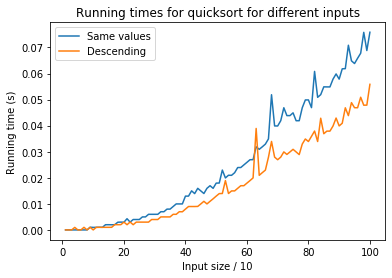

In [14]:
%matplotlib inline

n = list(range(1, 101))

plt.plot(n, time_samevalues, label = "Same values")
plt.plot(n, time_descending, label = "Descending")

plt.xlabel('Input size / 10')
plt.ylabel('Running time (s)')
plt.title('Running times for quicksort for different inputs')
plt.legend()
plt.show()

As the plot shows, when we have input arrays with all same values, the running time is higher than if the array is given with decreasing order of elements, which in other algorithms is a worst-case input. <br>
That's the case because of the operations quicksort makes whenever it compares similar elements. Because it will keep swapping the same elements at every iteration of the partition procedure, which is not the case with a descending-order array, the computation takes measurably longer time for a the sorted list of equal elements than for the "completely" unsorted array of descending elements.